In [3]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

ROC-AUC Score: 0.6360786124794745
Precision-Recall AUC: 0.14819198715929807

Classification Report:
              precision    recall  f1-score   support

      Normal       0.91      0.91      0.91      1344
     Anomaly       0.18      0.19      0.18       145

    accuracy                           0.84      1489
   macro avg       0.55      0.55      0.55      1489
weighted avg       0.84      0.84      0.84      1489



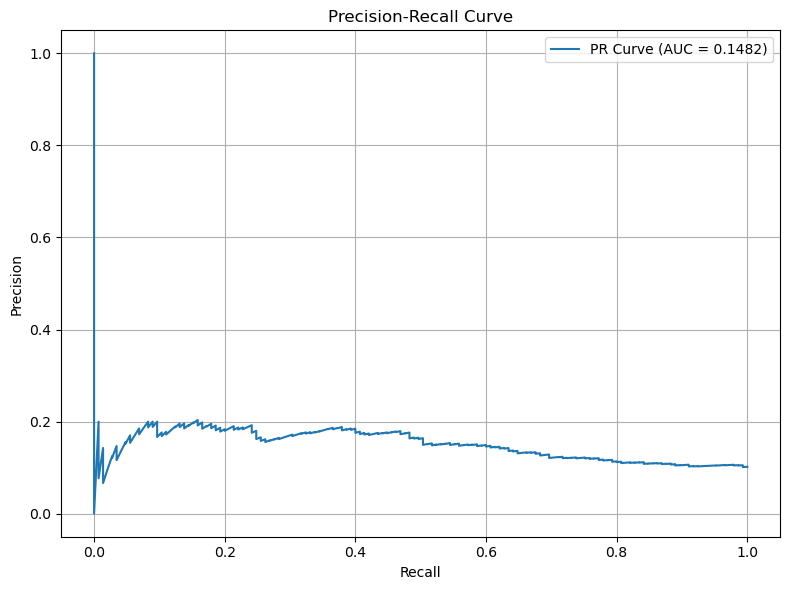

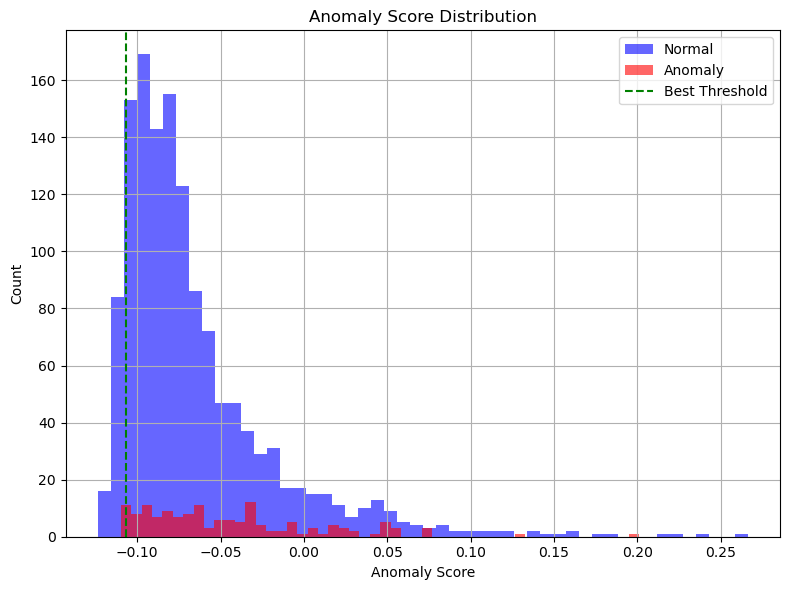

In [4]:
data = pd.read_csv("merged.csv")
# Preprocessing
X = data.iloc[:, 1:].values  # Features (replace with your dataset)
y = data.iloc[:, 0].values   # Labels (replace with your dataset)

# Handle NaN values with imputation
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'
X = imputer.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)  # Adjust contamination as needed
iso_forest.fit(X_scaled)

# Anomaly scores
anomaly_scores = -iso_forest.decision_function(X_scaled)  # Higher scores indicate anomalies
predictions = iso_forest.predict(X_scaled)  # Predictions: 1 for inliers, -1 for outliers
predictions = (predictions == -1).astype(int)  # Convert to 0 (normal) and 1 (anomaly)

# Evaluation
print("ROC-AUC Score:", roc_auc_score(y, anomaly_scores))

precision, recall, thresholds = precision_recall_curve(y, anomaly_scores)
pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", pr_auc)

print("\nClassification Report:")
print(classification_report(y, predictions, target_names=["Normal", "Anomaly"]))

# Visualize Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"PR Curve (AUC = {pr_auc:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Visualize Anomaly Scores
plt.figure(figsize=(8, 6))
plt.hist(anomaly_scores[y == 0], bins=50, color="blue", alpha=0.6, label="Normal")
plt.hist(anomaly_scores[y == 1], bins=50, color="red", alpha=0.6, label="Anomaly")
plt.axvline(thresholds[np.argmax(precision * recall)], color="green", linestyle="--", label="Best Threshold")
plt.xlabel("Anomaly Score")
plt.ylabel("Count")
plt.legend()
plt.title("Anomaly Score Distribution")
plt.grid()
plt.tight_layout()
plt.show()
